## Homework 11 

**Type your name here**

**DSCI 35600 - Machine Learning**

**Due Monday, 4/22**

## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Use `pandas` to load the contents of the tab-separated file `hw_11_data.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [7]:
df = pd.read_csv('hw_11_data.txt','\t')
df.head(10)

,F1,F2,F3,F4,F5,F6,y
0,-34.49,-0.168,572.572641,259.140016,P,C,2
1,-0.10,-2.595,470.205186,229.802866,Q,A,0
2,6.12,0.638,445.802367,185.265373,Q,A,3
3,12.37,1.459,548.148923,175.099249,Q,C,1
4,9.29,2.099,338.163010,123.615535,P,B,0
5,-20.64,-0.269,569.854093,130.333898,Q,A,0
6,-17.49,-0.832,739.996886,243.422914,P,C,2
7,20.53,-2.660,484.864777,172.923555,Q,C,3
8,-19.54,1.432,854.737353,77.289031,P,D,1
9,27.42,0.274,490.601855,233.826944,Q,D,2


Your goal in this assignment will be to use features F1 - F6 to predict one of four possible values for y: 0, 1, 2, or 3. 

## Part B: Preparing the Data

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [10]:
X_num = df.iloc[:, [0, 1, 2, 3]].values
X_cat = df.iloc[:, [4,5]].values.astype('str')
y = df.iloc[:, 6].values
print(X_num.shape)
print(X_cat.shape)
print(y.shape)

(1687, 4)
(1687, 2)
(1687,)


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [16]:
X_num_train, X_num_val, y_train, y_val = train_test_split(X_num, y, test_size = 0.2, random_state = 1)

scaler = StandardScaler().fit(X_num_train)
X_sca_train = scaler.transform(X_num_train)
X_sca_val = scaler.transform(X_num_val)
print(X_sca_train.shape)
print(X_sca_val.shape)

(1349, 4)
(338, 4)


#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [18]:
enc = OneHotEncoder(sparse=False)
X_enc = enc.fit_transform(X_cat)

X_enc_train, X_enc_val, y_train, y_val = train_test_split(X_enc, y, test_size = 0.2, random_state = 1)
print(X_enc_train.shape)
print(X_enc_val.shape)

(1349, 6)
(338, 6)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [20]:
X_train = np.hstack([X_sca_train, X_enc_train])
X_val = np.hstack([X_sca_val, X_enc_val])
print(X_train.shape)
print(X_val.shape)

(1349, 10)
(338, 10)


## Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -4 to 0. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Label your axes, and display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

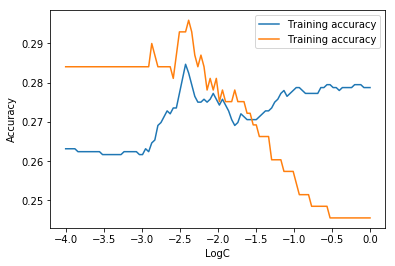

In [24]:
tr_acc = []
va_acc = []
exp_list = np.linspace(0,-4, 100)

for k in exp_list:
    temp = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')
    temp.fit(X_train, y_train)
    tr_acc.append(temp.score(X_train, y_train))
    va_acc.append(temp.score(X_val, y_val))
    
plt.plot(exp_list,tr_acc, label = 'Training accuracy')
plt.plot(exp_list,va_acc, label = 'Training accuracy')
plt.xlabel('LogC')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [25]:
idx = np.argmax(va_acc)
k = exp_list[idx]
print(k)

-2.383838383838384


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [27]:
mod1 = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr')
mod1.fit(X_train, y_train)
print('Training accuracy:', mod1.score(X_train, y_train))
print('Validation accuracy:', mod1.score(X_val, y_val))

Training accuracy: 0.2824314306893996
Validation accuracy: 0.2958579881656805


## Part D: K-Nearest Neighbors Model

In the cell below, create and fit several KNN models, each with a different value of `K`. In particular, consider 25 models with values of `K` ranging from 1 to 25. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `K`. Label your axes, and display a legend for your plot. 

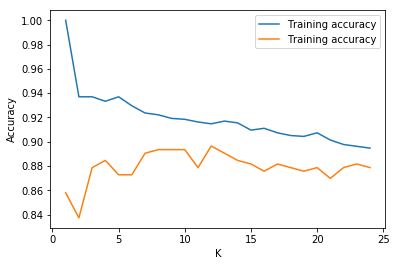

In [32]:
tr_acc = []
va_acc = []
K_list = range(1, 25)

for k in K_list:
    temp = KNeighborsClassifier(n_neighbors =k)
    temp.fit(X_train, y_train)
    tr_acc.append(temp.score(X_train, y_train))
    va_acc.append(temp.score(X_val, y_val))
    
plt.plot(K_list, tr_acc, label = 'Training accuracy')
plt.plot(K_list, va_acc, label = 'Training accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `K` that results in the largest validation accuracy. Print this result. 

In [34]:
idx = np.argmax(va_acc)
k = K_list[idx]
print(k)

12


Create a KNN model using the previously determined value of `K`. Print the training and validation accuracies for this model, clearly indicating which is which.

In [36]:
mod2 = KNeighborsClassifier(n_neighbors =k)
mod2.fit(X_train, y_train)
print('Training accuracy:', mod2.score(X_train, y_train))
print('Validation accuracy:', mod2.score(X_val, y_val))

Training accuracy: 0.9147516679021498
Validation accuracy: 0.8964497041420119


## Part E: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_dept from 1 to 30. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

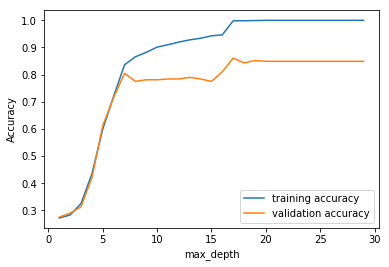

In [37]:
tr_acc = []
va_acc = []
max_list = range(1, 30)

for d in max_list:
    np.random.seed(1)
    temp = DecisionTreeClassifier(max_depth = d)
    temp.fit(X_train, y_train)
    tr_acc.append(temp.score(X_train, y_train))
    va_acc.append(temp.score(X_val, y_val))
    
plt.plot(max_list, tr_acc, label = 'training accuracy')
plt.plot(max_list, va_acc, label = 'validation accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [38]:
idx = np.argmax(va_acc)
best_d = max_list[idx]
print(best_d)

17


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [39]:
np.random.seed(1)
mod3 = DecisionTreeClassifier(max_depth = 17)
mod3.fit(X_train, y_train)
print('training accuracy:', mod3.score(X_train, y_train))
print('validation accuracy:', mod3.score(X_val, y_val))

training accuracy: 0.9985174203113417
validation accuracy: 0.8609467455621301


## Part F: Random Forest Model

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_dept from 1 to 30. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

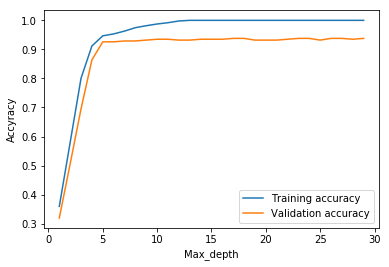

In [41]:
tr_acc = []
va_acc = []
max_list = range(1, 30)
for d in max_list:
    temp = RandomForestClassifier(n_estimators=200, max_depth = d)
    temp.fit(X_train, y_train)
    tr_acc.append(temp.score(X_train, y_train))
    va_acc.append(temp.score(X_val, y_val))

plt.plot(max_list, tr_acc, label = 'Training accuracy')
plt.plot(max_list, va_acc, label = 'Validation accuracy')
plt.xlabel('Max_depth')
plt.ylabel('Accyracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [42]:
idx = np.argmax(va_acc)
best_d = max_list[idx]
print(best_d)

17


Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [43]:
np.random.seed(1)
mod4 = RandomForestClassifier(n_estimators=200, max_depth = 17)
mod4.fit(X_train, y_train)
print('Training accuracy: ', mod4.score(X_train, y_train))
print('Validation accuracy: ', mod4.score(X_val, y_val))

Training accuracy:  1.0
Validation accuracy:  0.9378698224852071


## Part G: Summary

Print the validation accuracies for each of the four models, clearly indicating which is which. 

In [47]:
print('Logistic Regression model Validation accuracy:', mod1.score(X_val, y_val))
print('KNN model Validation accuracy:', mod2.score(X_val, y_val))
print('Desicion Tree model Validation accuracy:', mod3.score(X_val, y_val))
print('Random forest model Validation accuracy: ', mod4.score(X_val, y_val))

Logistic Regression model Validation accuracy: 0.2958579881656805
KNN model Validation accuracy: 0.8964497041420119
Desicion Tree model Validation accuracy: 0.8609467455621301
Random forest model Validation accuracy:  0.9378698224852071
